# Vježbe 3 - drugi dio

Thee essence of supervised machine learning is the creation of mechanisms that can look at exam-ples and produce generalizations. More concretely, rather than designing an algorithm to performa task (“distinguish spam from non-spam email”), we design an algorithm whose input is a set of labeled examples (“This pile of emails are spam. This other pile of emails are not spam.”), and its output is a function (or a program) that receives an instance (an email) and produces the desired label (spam or not-spam). It is expected that the resulting function will produce correct label predictions also for instances it has not seen during training.

                                                             Neural Network Methods in Natural Language Processing - Y.Goldberg

---
---
1. Ponavljanje: SVM
1. Upoznavanje i rad s SVM implementacijom u scikit-learn-u
    - Način 1
    - Način 2
    - Razlike između LinearSVC() i SVC(kernel="linear")

3. Ponavljanje: Logistička regresija


In [1]:
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

---
## 1.  Ponavljanje: SVM
---

- pretpostavka: podaci su linearno separabilni
- tražimo: hiperravninu koja razdvaja podatke
- što bi htjeli: pronaći hiperravninu sa što većom geomtrijskom marginom
- formalno postavljamo optimizacijski problem: maksimiziraj geometrijsku ravninu
- osim toga, uvjet je: neka svi podaci budu ispravno klasificirani tj. $y^{(i)}\theta^T x^{(i)} \geq \gamma \; \forall i = 1, 2, \cdots, m$
- što je bio $\gamma$? Kod perceptrona smo pretpostavili da možemo naći neki $\gamma > 0$ takav da je $y^{(i)}\theta ^T x^{(i)} \geq \gamma > 0$ što znači da su svi podaci ispravno klasificirani

$$maksimiziraj\; \frac{\gamma}{|| \theta||} \iff minimiziraj\; \frac{||\theta||}{\gamma} \iff minimiziraj\; \frac{1}{2}(\frac{||\theta||}{\gamma})^2$$
- sve zajedno formuliramo sljedeći optimizacijski problem:
$$\text{minimiziraj } \frac{1}{2}(\frac{||\theta||}{\gamma})^2 $$ $$\text{  uz uvjet  } y^{(i)}\theta^T x^{(i)} \geq \gamma  \; \forall i = 1, 2, \cdots, m$$

- izraz možemo pojednostaviti na 
$$\text{minimiziraj } \frac{1}{2}||\theta||^2 $$ $$\text{  uz uvjet  } y^{(i)}\theta^T x^{(i)} \geq 1  \; \forall i = 1, 2, \cdots, m$$


##### Generalizacija formule na hiperravninu koja ne prolazi kroz ishodište
- optimizacijski problem postaje
$$\text{minimiziraj } \frac{1}{2}||\theta||^2 $$ $$\text{  uz uvjet  } y^{(i)}(\theta^T x^{(i)}+\theta_0) \geq 1  \; \forall i = 1, 2, \cdots, m$$

##### Relaksacija uvjeta: dopuštanje krivo klasificiranih podataka
- jednostavan način za dopuštanje krivo klasificiranih podataka je uvođenjem *slack* varijable
- mjerimo koliko je uvjet narušen, to narušavanje minimiziramo
$$\text{minimiziraj } \frac{1}{2}||\theta||^2 + C\sum\limits_{i=1}^m \xi_i $$ 
$$\text{  uz uvjet  } y^{(i)}\theta^T x^{(i)} \geq 1 - \xi_i \text{ i } \xi_i \geq 0 \; \forall i = 1, 2, \cdots, m$$


In [90]:
########################################################
# Pomocna funkcija za crtanje vektora normale i hiperravnine

def plot_hyperplane(theta, theta0, X,y):
    # Uzmimo jedan jednostavan primjer za theta i nacrtajmo ga
    theta2 = theta[1]
    theta1 = theta[0]
    theta0 = theta0
    theta = np.array([theta1,theta2]).reshape(-1,1)


    xx = np.random.uniform(-10,5,(50,1))
    yy = -xx*(theta1/theta2) - (theta0/theta2)

    plt.plot(xx,yy, color='darkblue', label='Pravac')
   
    # Nacrtajmo vektor normalne theta
 
    plt.quiver(*[xx[8], yy[8]], *theta, color=['deeppink'], scale=1, label='theta')

    plt.scatter(X[:,0], X[:,1], c = y, cmap='PiYG')

    
    plt.legend()
    plt.gca().set_aspect('equal')  
    plt.show()
    ############################

In [ ]:
# Neka su danm dani podaci
X,y = make_blobs(n_samples = 10, n_features = 2, centers = 2, random_state=9)
y = np.array([-1 if i ==0 else 1 for i in y])
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

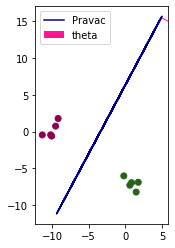

In [91]:
# Zadan je theta* ()
theta = np.array([0.15, -0.08])
theta0 = 0.51
plot_hyperplane(theta, theta0, X,y)

In [ ]:
min_udaljenost = 10000
for i,podatak in enumerate(X):
    if  y[i]*(podatak.dot(theta)+theta0) < min_udaljenost:
        min_udaljenost = y[i]*(podatak.dot(theta)+theta0)
    print(y[i]*(podatak.dot(theta)+theta0), podatak)

---
## 2.  Upoznavanje i rad s SVM implementacijom u scikit-learn-u
---
Zadan vam je skup podataka $X$ koji ima $m=7$ primjera i pripadne oznake $y$. Koristeći scatter_plot vizualizirajte podatke i označite pripadne klase. <br>

- Primijenite model `SVC` s linearnom funkcijom na  (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) <br>
- Ispišite koeficijente $\theta_0$ i $\theta$. 
<br>
- Na scatter_plot-u s početka zadatke nacrtajte pravac određen koeficijentima $\theta_0$ i $\theta$
- Ispišite potporne vektore. Na gornjem scatter_plotu označite potporne vektore. 
- Izračunajte širinu dobivene margine.

Uočite koji su potporni vektori i kolika je njihova udaljetnost do hiperravnine. 

#### Način 1:

In [ ]:
X = np.array([[2,3.5], [2,3], [1,4], [3,3], [5,2], [4,2.25], [6,3]])
y = np.array([1, 1, 1, 1, -1, -1, -1])

plt.scatter(X[:,0], X[:,1], c=['red' if i==1 else 'blue' for i in y])
plt.show()

In [46]:
# Instanciranje modela
clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Koeficijenti se dobivaju preko atributa coef_
# Koeficijent pomaka se dobiva preko atributa  clf.intercept_
theta = clf.coef_[0]
theta_0 =  clf.intercept_[0]
print("theta = ", clf.coef_, clf.intercept_)

# Neke informacije o potpotnim vektorima
# support_vectors_ - potporni vektori
# support_ - indeksi potpornih vektora
# n_support_ - broj potpornih vektora za svaku klasu

print("Potporni vektori su:\n ", clf.support_vectors_)
print("Gamma = ",np.min(np.abs((X.dot(theta)+theta_0)/np.linalg.norm(theta))) )


xx = np.linspace(1,5)
yy =  -theta[0]/theta[1]* xx - theta_0 / theta[1]
plt.plot(xx, yy, 'k-')
plt.scatter(X[:,0], X[:,1], c=['red' if i==1 else 'blue' for i in y])
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],marker='*')
plt.show()


#### Način 2:

In [ ]:
## 1. 
# Postavljamo model
lin_clf = LinearSVC()
lin_clf.fit(X,y)
print(LinearSVC(tol=0.0001))

## 2. 
theta_lin = lin_clf.coef_[0]
theta_0_lin =  lin_clf.intercept_[0]
print("theta = ", lin_clf.coef_, lin_clf.intercept_)
print("Gamma = ",np.min(np.abs((X.dot(theta_lin)+theta_0_lin)/np.linalg.norm(theta_lin))) )

## 3. Vizualizacija
# Nemamo support vektore
xx = np.linspace(1,5)
yy =  -theta_lin[0]/theta_lin[1]* xx - theta_0_lin / theta_lin[1]
plt.plot(xx, yy, 'k-')
plt.scatter(X[:,0], X[:,1], c=['red' if i==1 else 'blue' for i in y])
plt.show()

In [ ]:
# Razliciti koeficijenti pravaca? 
# Prvi: theta :  [[-1.    0.75]] [1.53125] => -x + 0.75y + 1.53125 = 0 => y = 1.3333x - 2.041667
# Drugi:  [[-0.60234893  0.77392612]] [0.06136465] => -0.60234893x + 0.77392612y + 0.06136465 = 0 => y = 0.0.7783028824508468 x - 0.07929006195061616 
xx = np.linspace(1,5)

# Razliciti pravci ali kada gledamo bilo koji od ta dva pravca s obzirom na podatke vidimo kako su na sredini
plt.plot(xx, 1.3333*xx - 2.041667, 'k-')
plt.plot(xx, 0.7783028811873632*xx - 0.0792900645922814 , 'g--')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],marker='*')
plt.show()

#### Razlike između LinearSVC() i SVC(kernel="linear")
- LinearSVC je implementiran kao liblinear 
- SVC se temelji na liblinear 

Preporuka je koristiti LinearSVC za veće skupove podataka (nekoliko (10ak) tisuća podataka)

---
## 3. Logistička regresija
---

- za model funkciju koristimo logističku (sigmoidnu) funkciju koja je općenito oblika $g(z) = \frac{1}{1+e^{-z}}$
- model funkcija s obzirom na parametre $\theta$ je $h_{\theta}(x) = \frac{1}{1+e^{-\theta ^T x}}$
- sigmoidna funkcija preslikava sve na interval $<0,1>$ pa njenu izlaznu vrijednost interpretiramo kao vjerojatnost da podatak $x$ s obzirom na parametar $\theta$ pripada klasi $1$
- $\theta ^T x$ definira hiperravninu (decision boundary) s obzirom na koji klasificiramo podatke - sve što je "ispod" je klasa 0, sve "iznad" klasa 1

---

In [92]:
#############################################

# Pomocna funkcija za crtanje
def plot_contour(X,y, theta):
    delta = 0.04  # mesh resolution
    x_ = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1,delta)
    y_ = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1,delta)
    X_, Y_ = np.meshgrid(x_,y_)
    XX = np.c_[X_.ravel(), Y_.ravel()]
    
    Z = h(XX.dot(theta[1:]) + theta[0])
    Z = np.array([-1 if i < 0.5 else 1 for i in Z])
    
    Z = Z.reshape(X_.shape)

    plt.contourf(X_, Y_, Z, cmap='spring')
    plt.scatter(X[:,0], X[:,1],c=y, cmap='gray')
    plt.show()
    
####################################################

### Razumijevanje modela

In [ ]:
X = np.array([[-3.78,3.96],[-3.98,3.8],[-0.95,5.18],[-2.71,4],[-0.6,4.31],[-2.58,4.65],[-2.54,4.28],[-3.55,1.62],[-3.13,4.4],[-1.93,5.62]])
y = np.array([-1, -1, 1, 1, 1, 1, -1, -1, -1, 1])

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [64]:
# Što se zapravo događa u pozadini? 
# naučeni parametri
theta = np.array([0.325, 1.08, 0.59])

# model funkcija h_theta(x)
def h(z):
    return (1.0 / (1.0 + np.exp(-z)))

# theta^T * x
y_pred = h(theta[1:].dot(X[0].reshape(-1,1)) + theta[0])
if y_pred>=0.5: print('predikcija 1', 'stvarna', y[0])
else: print('predikcija -1', ' stvarna', y[0])

predikcija -1  stvarna -1


In [ ]:
# Prikazimo funkciju h

# Crtamo graf funkcije h 
# Tocke x,h(x)
xrange = np.arange(-3, 3, 0.01)
plt.plot(xrange, h(xrange), color='indigo')

# Crtamo predikcije
# predikcija = X*theta
# Tocke (predikcija, h(predikcija))
plt.scatter(X.dot(theta[1:]) + theta[0], h(X.dot(theta[1:]) + theta[0]))
plt.show()
# Napomena: h(X.dot(log.coef_.reshape(-1,1)) + log.intercept_) == log.predict_proba[:,1]

# Smisao: vidjeti kako funkcija h preslika sve na <0,1>

In [ ]:
plot_contour(X,y, theta)

### Primjer
Utjecaj parametra $\theta$ na izgled sigmoidne funkcije

In [19]:
def h(z, p):
    return (1.0 / (1.0 + np.exp(-p*z)))

In [ ]:
x_ = np.arange(-5, 5, 0.01)
for i in range(-3,3):
    plt.plot(x_, h(x_, i), color='indigo')
    plt.show()

#### Funkcija gubitka
$$ J(\theta, \theta_0) = \sum\limits_{i=1}^m \log{[1+exp({-y^{(i)}(\theta^Tx^{(i)}+\theta_0)})]} $$

Pogledajmo kako se ponaša funkcija gubitka. 

In [ ]:
# Ovisi o parametrima theta => oni utjecu na predikciju y(theta*X + theta0) => ovisi o predikciji i stvarnoj vrijednosti

# Predikcija 1, stvarna vrijednost 1
print(np.log(1+np.exp(-1*1)))

# Predikcija -1, stvarna vrijednost 1
print(np.log(1+np.exp(-1*(-1))))

# Predikcija 1, stvarna vrijednost -1
print(np.log(1+np.exp(1*1)))

# Predikcija -1, stvarna vrijednost -1
print(np.log(1+np.exp(1*-1)))

In [26]:
def J(y,yp):
    return np.log(1+np.exp(-y*yp))

In [ ]:
# Stvarna vrijednost 1:
# Predikcije se kreću od 0 do 1, vidimo da kako je predikcija bliža 1 => vrijednost funkcije gubitka se smanjuje
predikcije = np.arange(0.0, 1, 0.01)
for i,p in enumerate(list(predikcije)):
    plt.scatter(i,J(1,p))
plt.show()

In [ ]:
# Stvarna vrijednost -1
# Predikcije se kreću od 0 do 1, vidimo da kako je predikcija bliža 1 => vrijednost funkcije gubitka se povećava
predikcije = np.arange(0,1,0.01)
for i,p in enumerate(list(yp)):
    plt.scatter(i,J(-1,p))